In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [137]:
df=pd.read_csv("train-data.csv")


In [138]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [140]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [141]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [142]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

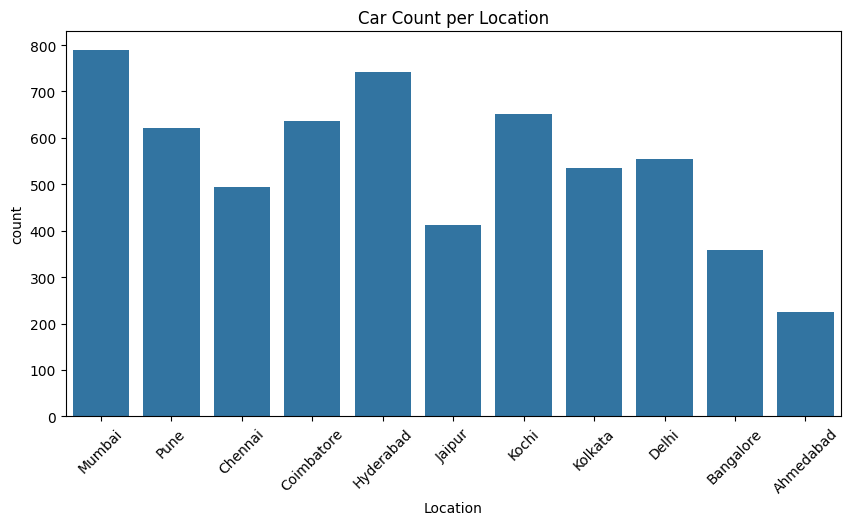

In [143]:
plt.figure(figsize=(10,5))
sns.countplot(x='Location', data=df)
plt.xticks(rotation=45)
plt.title("Car Count per Location")
plt.show()

In [144]:
df['Location'].value_counts().head(10)


Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: count, dtype: int64

In [145]:
df['Location'].nunique()


11

In [146]:
df2=df["Fuel_Type"].value_counts()
df2

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

<BarContainer object of 5 artists>

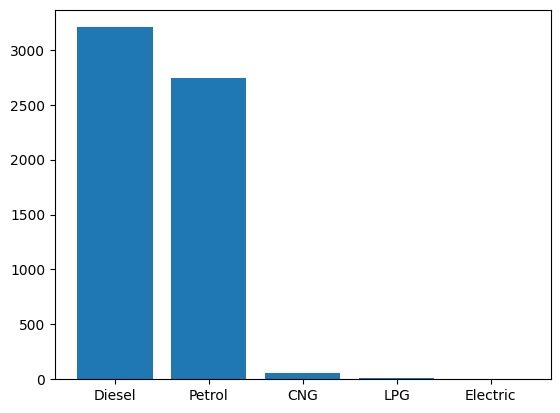

In [147]:
plt.bar(df2.index,df2.values)

In [148]:
len(df["Fuel_Type"].unique())

5

<BarContainer object of 5 artists>

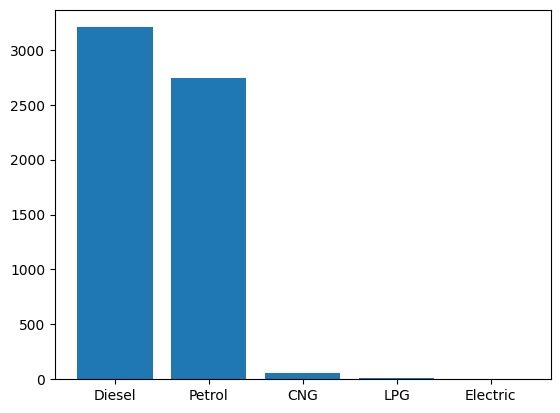

In [149]:
plt.bar(df2.index,df2.values)

In [150]:
df['Brand']=df['Name'].apply(lambda x:x.split()[0])

In [151]:
len(df['Brand'].unique())

31

In [152]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

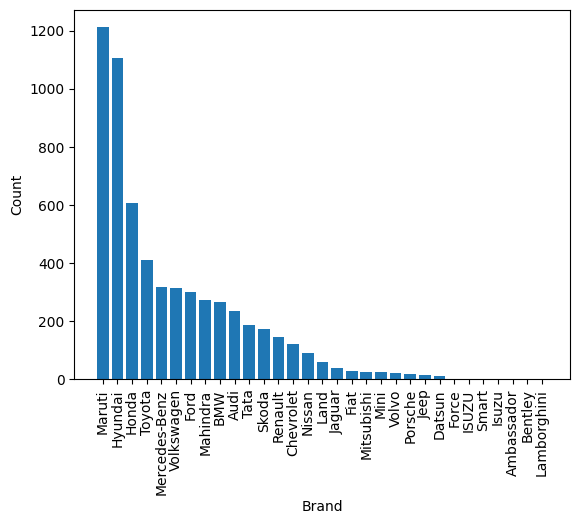

In [153]:
plt.xlabel("Brand")
plt.ylabel("Count")
plt.bar(df['Brand'].value_counts().index,df['Brand'].value_counts().values)
plt.xticks(rotation=90)
plt.show()


In [154]:
dfe=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type','Brand']],drop_first=True,dtype=int)
dfe

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df_1=pd.concat([df,dfe],axis=1)
df_1

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,0,0,0,0,0,0,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,0,0,0,0,0,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,0,0,0,0,0,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,0,0,0,0,0,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df_1.shape

(6019, 63)

In [157]:
df_1.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price','Brand'],axis=1,inplace=True)
df_1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df_1.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_Electric             int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
B

In [159]:
#string replace
df_1['Mileage']=df_1['Mileage'].str.replace(' km/kg','')
df_1['Mileage']=df_1['Mileage'].str.replace(' km/l','')
df_1['Mileage']=df_1['Mileage'].str.replace(' kmpl','')
df_1['Engine']=df_1['Engine'].str.replace(' CC','')
df_1['Power']=df_1['Power'].str.replace(' bhp','')
df_1['Mileage']=df_1['Mileage'].str.replace('null','0')
df_1['Engine']=df_1['Engine'].str.replace('null','0')
df_1['Power']=df_1['Power'].str.replace('null','0')

In [160]:
df_1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
